In [21]:
%matplotlib inline
import os
import time
import datetime
import numpy as np
import pandas as pd
import scipy as sc
import scipy.interpolate
import Plotting as plt
import DIC

# DIC of Carbon-Glass Hybrid Composite

Correlation Parameters:  
h_sub = 35  
h_step = 3  
h_f = 15  
Default Thresholds

In [22]:
sample = 'DIC Data'
DIC_data = DIC.DIC_3D(sample + '/')
print(DIC_data.get_mag())
DIC_strains = DIC_data.get_strains()
DIC_stress = DIC_data.get_img_stress()
DIC_SS = np.dstack((DIC_strains[:, 0]*100, DIC_stress))[0]

(70.611839, 0.014161931)


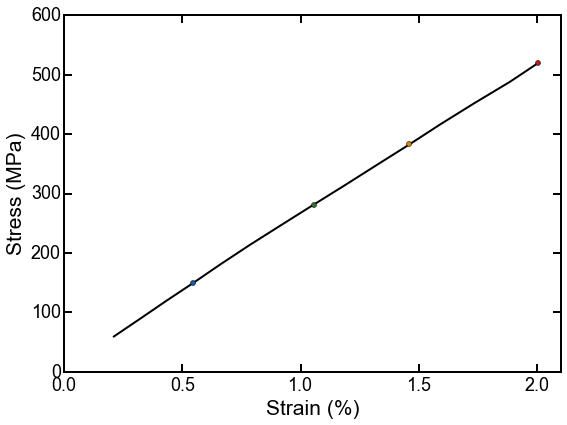

In [24]:
frames = [DIC.nearest(DIC_SS[:, 0], strain) for strain in [0.5, 1, 1.5, 2]]
data = [DIC_SS, ] + [np.vstack((np.array([-1, -1]), DIC_SS[frame])) for frame in frames]
plt.line_plot(data, 
              xlim=(0, 2.1), ylim=(0, 600),
              xlabel='Strain (%)', ylabel='Stress (MPa)',
             linestyles = ('-', '', '', '', ''),
              markers = ('', 'o', 'o', 'o', 'o'),
              colors = plt.get_COLORS(('black', 'blue', 'green', 'orange', 'red')), 
             )

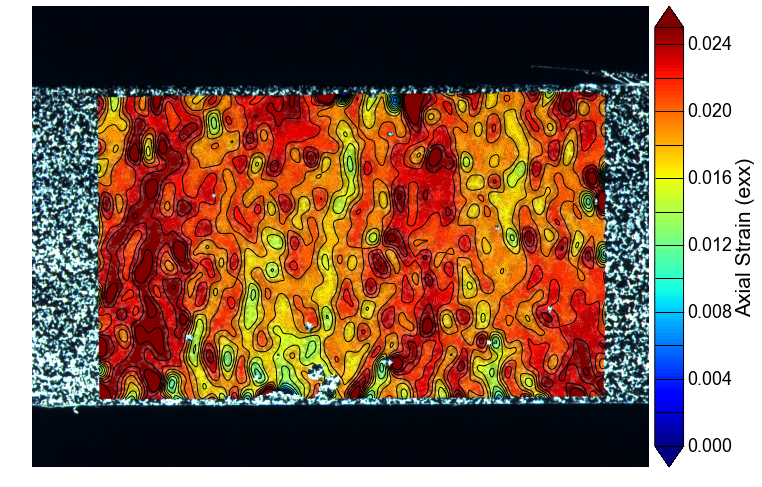

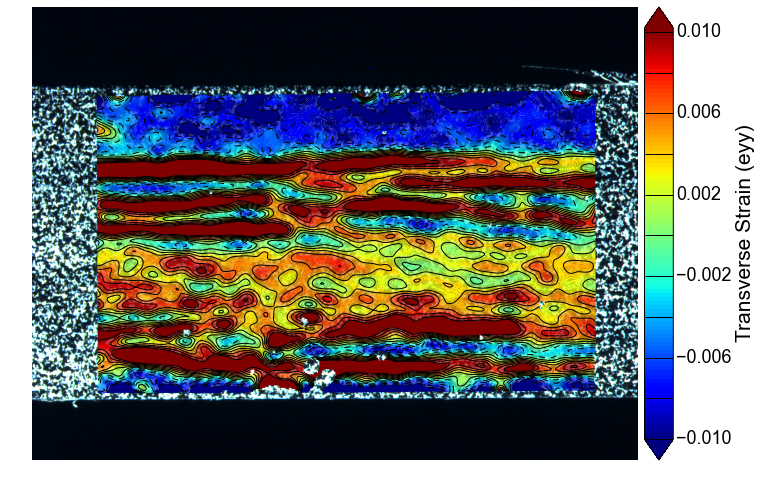

In [32]:
frame = frames[3]
DIC_data.contour_overlay(frame, 'exx',
                    zlim = (0, 0.025),
                    major_spacing = 0.002, colorbar_label='Axial Strain (exx)', figsize=8,
                       )

DIC_data.contour_overlay(frame, 'eyy',
                       zlim = (-0.01, 0.01),
                    major_spacing = 0.002, colorbar_label='Transverse Strain (eyy)', figsize=8,
                      )